In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(X_train,y_train) , (X_test, y_test) = cifar10.load_data()

In [6]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
X_train[0].shape

(32, 32, 3)

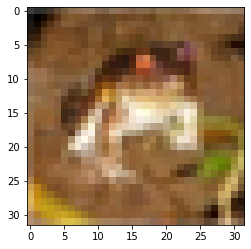

In [8]:
plt.imshow(X_train[0])

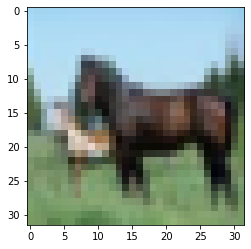

In [9]:
plt.imshow(X_train[12])

In [10]:
X_train = X_train/255

In [11]:
X_test = X_test/255

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_cat_train  = to_categorical(y_train, 10)

In [14]:
y_cat_test = to_categorical(y_test, 10)

In [15]:
from tensorflow.keras.models import Sequential

In [16]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [17]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               8

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 2)

In [21]:
model.fit(X_train, y_cat_train, validation_data = (X_test, y_cat_test), epochs = 10, callbacks = [early_stop])

Epoch 1/10
1563/1563 [==============================] - 39s 24ms/step - loss: 1.5076 - accuracy: 0.4469 - val_loss: 1.2483 - val_accuracy: 0.5571
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1330 - accuracy: 0.5996 - val_loss: 1.0672 - val_accuracy: 0.6166
Epoch 3/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.9391 - accuracy: 0.6707 - val_loss: 1.0247 - val_accuracy: 0.6301
Epoch 4/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.7943 - accuracy: 0.7206 - val_loss: 1.0174 - val_accuracy: 0.6540
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6659 - accuracy: 0.7675 - val_loss: 0.9674 - val_accuracy: 0.6728
Epoch 6/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.5527 - accuracy: 0.8066 - val_loss: 1.0331 - val_accuracy: 0.6685
Epoch 7/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.4572 - accuracy: 0.8410 - val_loss: 1.1167 -

In [22]:
metrics = pd.DataFrame(model.history.history)

In [23]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.507587,0.44694,1.248279,0.5571
1,1.133014,0.59960,1.067175,0.6166
2,0.939094,0.67070,1.024678,0.6301
3,0.794254,0.72062,1.017378,0.6540
4,0.665942,0.76752,0.967426,0.6728
5,0.552721,0.80662,1.033128,0.6685
6,0.457236,0.84102,1.116660,0.6707


In [24]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot: >

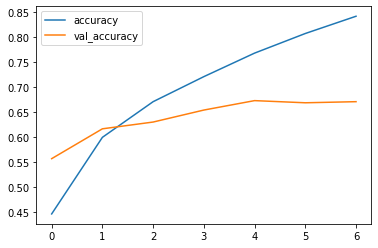

In [25]:
metrics[["accuracy", "val_accuracy"]].plot()

<AxesSubplot: >

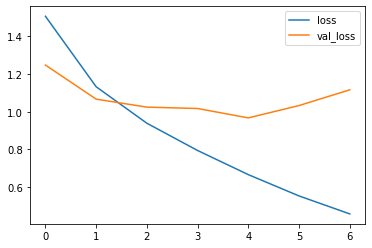

In [26]:
metrics[["loss", "val_loss"]].plot()

In [27]:
model.evaluate(X_test, y_cat_test, verbose = 1)

313/313 [==============================] - 2s 6ms/step - loss: 1.1167 - accuracy: 0.6707


[1.1166598796844482, 0.6707000136375427]

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 2s 6ms/step


In [30]:
print(classification_report(y_test, classes_x))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70      1000
           1       0.77      0.82      0.80      1000
           2       0.55      0.62      0.58      1000
           3       0.45      0.50      0.48      1000
           4       0.76      0.46      0.57      1000
           5       0.51      0.63      0.56      1000
           6       0.81      0.70      0.75      1000
           7       0.74      0.74      0.74      1000
           8       0.73      0.82      0.77      1000
           9       0.74      0.78      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [31]:
confusion_matrix(y_test, classes_x)

array([[640,  33,  73,  24,  12,  16,   6,  10, 138,  48],
       [ 15, 824,  15,  11,   2,   7,   5,   0,  45,  76],
       [ 43,  16, 616,  80,  37,  99,  44,  29,  18,  18],
       [ 12,  15,  74, 501,  23, 249,  34,  44,  23,  25],
       [ 23,  10, 153, 122, 459,  74,  46,  89,  18,   6],
       [  9,   5,  58, 174,  18, 633,  11,  66,   7,  19],
       [  8,  16,  69,  99,  20,  54, 698,  11,  13,  12],
       [ 12,   9,  39,  53,  30,  81,   5, 739,   6,  26],
       [ 34,  54,  22,  17,   3,   7,   4,   5, 817,  37],
       [ 27,  89,  11,  21,   0,  21,   5,   9,  37, 780]], dtype=int64)

<AxesSubplot: >

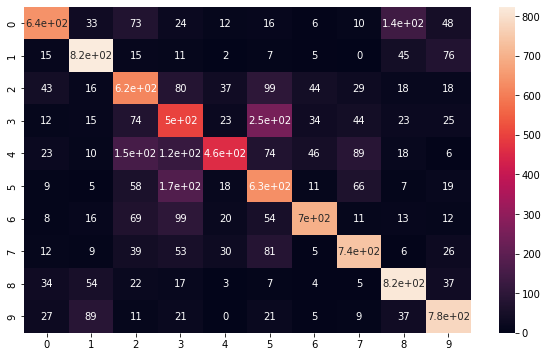

In [32]:
import seaborn as sns
plt.figure(figsize = (10, 6))
sns.heatmap(confusion_matrix(y_test, classes_x), annot = True)

In [33]:
my_image = X_test[0]

In [34]:
my_image

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

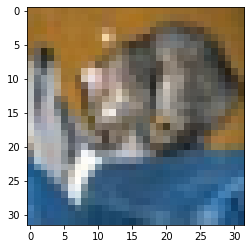

In [35]:
plt.imshow(my_image)

In [36]:
y_test[0]

array([3], dtype=uint8)

In [37]:
model.predict(my_image.reshape(1, 32, 32, 3))

1/1 [==============================] - 0s 22ms/step


array([[0.0037583 , 0.01162783, 0.00252177, 0.6965631 , 0.00128434,
        0.26562187, 0.00185769, 0.00415357, 0.00911347, 0.00349796]],
      dtype=float32)

In [ ]:
plot_sample